# Week 4: Intro to Statistics and Probability

In [1]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3, venn2_circles, venn3_circles
import scipy.stats as stats
import random

## Day 2: Intro to probability
* **Probability** is the study of chance behavior
* Chance behavior is unpredictable in the short run, but has a regular and predictable pattern in the long run
* This is why we can use probability to gain useful results from random samples and randomized experiments
* In this context **relative frequency** (proportion of occurrences) of an outcome settles down to one value over the long run. That one value is then defined to be the **probability** of that outcome.
* Bottom line, if we perform an experiemnt many times and record the number of successful observations, then
\begin{equation} \text{probability} = \frac{\text{# successes}}{\text{# observations}} \end{equation}

### Example 1
* Visualize the relative frequencies of getting tails in the *experiment* tossing a fair coin (*fair* means equal chances of getting heads **H** or tails **T**). Then give an approximation of the probability $P(A)$, where $A$ is the *event* "**T** has been tossed"

In [5]:
n = 1000

num_tails = 0

for i in range(n):
    toss = np.random.randint(0,2) # does not include the 2
    
    if toss == 1:
        num_tails += 1
        
prob = num_tails/n
prob

0.477

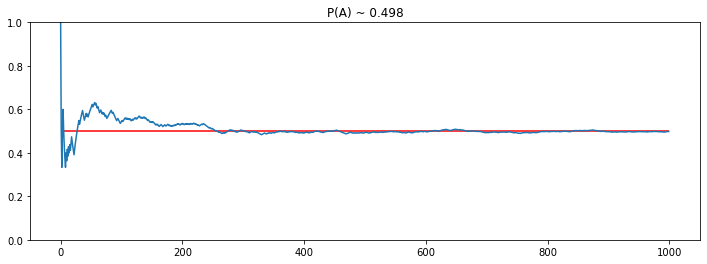

In [12]:
# We will randomly generate 0 for heads, and 1 for tails

n = 1000 # number of tosses

toss = np.zeros(n) # here we will keep the outcomes
freq = np.zeros(n) # here we will keep the frequences

for i in range(n):
    toss[i] = random.randint(0,1) # includes both numbers
    freq[i] = np.sum(toss[:(i+1)])/(i+1)

#print(toss)
#print(freq)

# Visualize the relative frequencies
plt.figure(figsize=(12, 4))
plt.hlines(0.5, 0, n, color='r')
plt.ylim(0,1)
plt.title(f'P(A) ~ {freq[-1]}')
plt.plot(freq)
plt.show()


### Example 2
* Two fair six-sided dice are tossed. Using relative frequencies, estimate the probability $P(B)$ where $B$ is the event:
    * $B$: the sum of two outcomes is 5

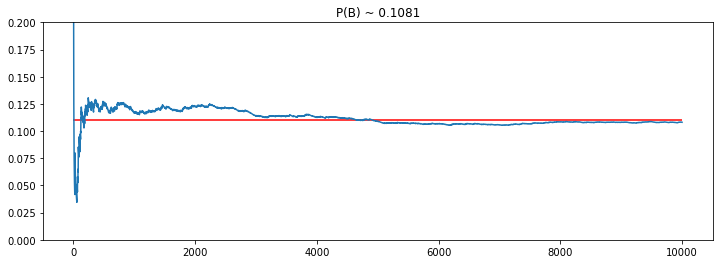

In [27]:
n = 10000 # tosses

sums = np.zeros(n) #here we store the sums
freq = np.zeros(n) #here we store the frequencies

for i in range(n):
    sums[i] = random.randint(1,6) + random.randint(1,6) # includes both numbers
    freq[i] = np.sum(sums[:(i+1)]==5)/(i+1)
    
# Visualize the relative frequencies
plt.figure(figsize=(12, 4))
plt.hlines(0.11, 0, n, color='r')
plt.ylim(0, 0.2)
plt.title(f'P(B) ~ {freq[-1]}')
plt.plot(freq)
plt.show()

### Basic probability rules
Note: The logical **or** corresponds to union operation for sets:
\begin{equation} A \cup B \quad\Leftrightarrow \quad A \text{ or } B \end{equation}

The logical **and** corresponds to intersection operation for sets:
\begin{equation} A \cap B \quad\Leftrightarrow \quad A \text{ and } B \end{equation}

We can think of events as subsets of the sample space, so we can visualize them by using Venn diagrams.

Let $A$ and $B$ be some events that can occur in some experiment, and let $S$ be the set of all possible outcomes ($S$ is called **sample space**). Here are the basic rules of probability:
* $0 \leqslant P(A) \leqslant 1$ for any event $A$
* $P(S) = 1$
* If two events $A$ and $B$ cannot happen in the same time, i.e. they are **disjoint** or **mutually exclusive**, then $P(A \cap B) = 0$ and
\begin{equation} P(A \cup B) = P(A) + P(B) \end{equation}
This is the *addition rule for disjoint events*
* In general, when the events $A$ and $B$ are not disjoint (are not mutually exclusive), then $P(A \cap B) \neq 0$ and:
\begin{equation} P(A \cup B) = P(A) + P(B) - P(A \cap B) \end{equation}
This is the *general addition rule*
* For any event $A$, the **complementary event** $A$ does not happen” is labeled by $A'$ and:
\begin{equation} P(A') = 1 - P(A) \end{equation}


### Example 3
Load the *student-mat.csv* data for this example. Details: [https://www.kaggle.com/uciml/student-alcohol-consumption#]

We randomly choose a student from the data set. Consider the following events:
* $A$: the student is female (look at feature *sex*)
* $B$: the student lives in an urban area (look at feature *address*)

Calculate the following probabilities: 
* $P(A)$ and $P(B)$
* $P(A \cap B)$ and $P(A \cup B)$

In [28]:
# Loading the data set
df = pd.read_csv('student-mat.csv')

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [43]:
# Get the total

total = df.shape[0]

# females

f = df['sex'].value_counts()['F']
f

PA = f/total
print(PA)

# urbam dwellers

u = df['address'].value_counts()['U']
u

PB = u/total
print(PB)

# female and urban

f_and_u = df.loc[(df['sex']=='F') & (df['address']=='U')]['sex'].count()

PA_and_B = f_and_u/total
print(PA_and_B)

# female or urban

f_or_u = df.loc[(df['sex']=='F') | (df['address']=='U')]['sex'].count()

PA_or_B = f_or_u/total
print(PA_or_B)

0.5265822784810127
0.7772151898734178
0.4151898734177215
0.8886075949367088


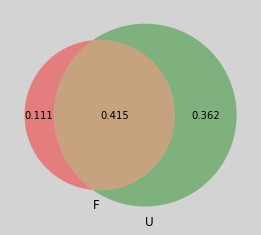

In [45]:
# Visualization time -- Venn Diagrams!
plt.figure(facecolor='lightgray')
venn2(subsets = np.round((PA - PA_and_B, PB - PA_and_B, PA_and_B), 3),
      set_labels=['F', 'U'])
plt.show()

### Example 4
Consider the features *mjob* and *fjob* (mother and father job, respectively). Calculate the probability that for a randomly selected student:
* one parent is a teacher
* both parents are teachers
* neither parent is a teacher

In [49]:
# Note that the total is still the same!
# One parent is a teacher

either_t = df.loc[(df['Mjob']=='teacher') | (df['Fjob']=='teacher')]['sex'].count()

PC = either_t/total
print(PC)

# Both parents are teachers

both_t = df.loc[(df['Mjob']=='teacher') & (df['Fjob']=='teacher')]['sex'].count()

PD = both_t/total
print(PD)

# Neither parent is a teacher

neither_T = df.loc[(df['Mjob']!='teacher') & (df['Fjob']!='teacher')]['sex'].count()

PE = neither_T/total
print(PE)

0.189873417721519
0.030379746835443037
0.810126582278481


### Conditional Probability & Independent Events
If the occurrence of $A$ and $B$ are dependent on each other, then we can talk about the probability that **$A$ occurs given that $B$ has occurred**. This is the conditional probability of $A$ given $B$, labeled as $P(A \mid B)$. We calculate the conditional probability of $A$ given $B$ as:
\begin{equation} P(A \mid B) = \frac{P(A \cap B)}{P(B)} \end{equation}

Generally, $P(A) \neq P(A \mid B)$. In a case when $P(A) = P(A \mid B)$, then the occurence of $B$ does not influence the occurence of $A$, so we say that $A$ and $B$ are **independent events**. For independent events, it can also be shown that
\begin{equation} P(A \cap B) = P(A) \cdot P(B) \end{equation}

### Example 5
Let $C$ be the event "the student is engaged in romantic relationship", and let $D$ be the event "the student's study time is three or more hours weekly". Calculate the conditional probabilities:
* $P(C \mid D)$ and
* $P(D \mid C)$

In [ ]:
# P(C | D)
# Note: total is still the same!
# Using the formula: P(C | D) = P(C and D)/P(D)




# Direct calculation: P(D | C)
# If C is satisfied, check if D is also satisfied


### Practice example
Let $M_h$ and $F_h$ be the events "the student's mother works in healthcare" and "student's father works in healthcare", respectively. Find the conditional probabilities:
* $P(M_h \mid F_h)$
* $P(F_h \mid M_h)$

### The Monty Hall Problem
Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a **car**; behind the others, **goats**. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" [See Wikipedia for details](https://en.wikipedia.org/wiki/Monty_Hall_problem)

![Monty_Hall_problem](monty_hall.png)

*Is it to your advantage to switch your choice?*

Let us run a simulation to answer the question!

In [ ]:
# Number of simulations
n = 1000

# Number of wins
wins_when_keep = np.zeros(n)
wins_when_switch = np.zeros(n)

# Frequencies
freq_keep = np.zeros(n)
freq_switch = np.zeros(n)

# We start simulating
